In [1]:
#!pip pip install numpy --upgrade
#!pip install scapy
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('KremlinRussia_E_tweets.csv')
df = df[['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Reply Count', 'Retweet Count']]
df.head()

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,Retweet Count
0,2022-02-27 15:35:43+00:00,1497958634000719875,Telephone conversation with Prime Minister of ...,KremlinRussia_E,1511,1145,253
1,2022-02-27 12:36:51+00:00,1497913619962548226,The President congratulated Special Operations...,KremlinRussia_E,3769,3582,467
2,2022-02-26 18:57:59+00:00,1497647148019728394,Telephone conversation with Prime Minister of ...,KremlinRussia_E,4402,8858,524
3,2022-02-26 12:45:08+00:00,1497553314635862022,Telephone conversation with Sadyr Japarov: sit...,KremlinRussia_E,4223,7202,499
4,2022-02-25 17:42:54+00:00,1497265862784339971,Meeting with permanent members of the Security...,KremlinRussia_E,12762,19355,1563


In [4]:
df = df[['Datetime', 'Text', 'Like Count', 'Reply Count', 'Retweet Count']]
df

,Datetime,Text,Like Count,Reply Count,Retweet Count
0,2022-02-27 15:35:43+00:00,Telephone conversation with Prime Minister of ...,1511,1145,253
1,2022-02-27 12:36:51+00:00,The President congratulated Special Operations...,3769,3582,467
2,2022-02-26 18:57:59+00:00,Telephone conversation with Prime Minister of ...,4402,8858,524
3,2022-02-26 12:45:08+00:00,Telephone conversation with Sadyr Japarov: sit...,4223,7202,499
4,2022-02-25 17:42:54+00:00,Meeting with permanent members of the Security...,12762,19355,1563
...,...,...,...,...,...
9168,2010-11-30 13:29:24+00:00,We need to modernise our economy and create gr...,0,0,0
9169,2010-11-30 13:28:11+00:00,Russian President Dmitry Medvedev has delivere...,0,0,1
9170,2010-11-29 17:03:19+00:00,Dmitry Medvedev met with Moscow Mayor Sergei S...,0,0,0
9171,2010-11-29 15:44:41+00:00,Meeting of the Commission for Modernisation wa...,0,0,0


In [5]:
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df

,Datetime,Text,Like Count,Reply Count,Retweet Count,year,month
0,2022-02-27 15:35:43+00:00,Telephone conversation with Prime Minister of ...,1511,1145,253,2022,2
1,2022-02-27 12:36:51+00:00,The President congratulated Special Operations...,3769,3582,467,2022,2
2,2022-02-26 18:57:59+00:00,Telephone conversation with Prime Minister of ...,4402,8858,524,2022,2
3,2022-02-26 12:45:08+00:00,Telephone conversation with Sadyr Japarov: sit...,4223,7202,499,2022,2
4,2022-02-25 17:42:54+00:00,Meeting with permanent members of the Security...,12762,19355,1563,2022,2
...,...,...,...,...,...,...,...
9168,2010-11-30 13:29:24+00:00,We need to modernise our economy and create gr...,0,0,0,2010,11
9169,2010-11-30 13:28:11+00:00,Russian President Dmitry Medvedev has delivere...,0,0,1,2010,11
9170,2010-11-29 17:03:19+00:00,Dmitry Medvedev met with Moscow Mayor Sergei S...,0,0,0,2010,11
9171,2010-11-29 15:44:41+00:00,Meeting of the Commission for Modernisation wa...,0,0,0,2010,11


In [6]:
df['year'].value_counts()

2018    1037
2019     948
2017     898
2016     890
2014     867
2021     788
2015     755
2020     754
2012     686
2011     679
2013     651
2022     129
2010      91
Name: year, dtype: int64

In [7]:
df['Text'][0]

'Telephone conversation with Prime Minister of Israel Naftali Bennett @naftalibennett https://t.co/LD86Ewsz9P'

In [8]:
pd.DataFrame(df.groupby(["year","month"])['Text'].count())

Text
year month      
2010 11       20
     12       71
2011 1        46
     2        47
     3        64
...          ...
2021 10       55
     11       55
     12       89
2022 1        45
     2        84

[136 rows x 1 columns]

most of the tweets are posted as the war begun...

##### Lets see for year 2022

In [9]:
df22 = df[df['year'] == 2022]
df22 = df22['Text']
df22

0      Telephone conversation with Prime Minister of ...
1      The President congratulated Special Operations...
2      Telephone conversation with Prime Minister of ...
3      Telephone conversation with Sadyr Japarov: sit...
4      Meeting with permanent members of the Security...
                             ...                        
124    Vladimir Putin wished a merry Christmas to Ort...
125    #NovoOgaryovo: Meeting with Almaz-Antey Corpor...
126    Meeting with Director General of Tactical Miss...
127    "There can be no winners in a nuclear war." Le...
128    Telephone conversation with President of Turke...
Name: Text, Length: 129, dtype: object

In [10]:
#converting sentenses to words

all_sentences = []

for word in df22:
    all_sentences.append(word)

lines = list()
for line in all_sentences: ewswewdcx   
    words = line.split()
    for w in words: 
        lines.append(w)

In [11]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [12]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['telephon',
 'convers',
 'with',
 'prime',
 'minist',
 'of',
 'israel',
 'naftali',
 'bennett',
 'naftalibennett',
 'httpstcold86ewsz9p',
 'the',
 'presid',
 'congratul',
 'special',
 'oper',
 'forc',
 'personnel',
 'and',
 'veteran',
 'on',
 'their',
 'profession',
 'holiday',
 'httpstcoywjugexk5',
 'telephon',
 'convers',
 'with',
 'prime',
 'minist',
 'of',
 'armenia',
 'nikol',
 'pashinyan',
 'httpstcohrzhcoo7ld',
 'telephon',
 'convers',
 'with',
 'sadyr',
 'japarov',
 'situat',
 'in',
 'ukrain',
 'strengthen',
 'russiakyrgyzstan',
 'relat',
 'and',
 'strateg',
 'partnership',
 'httpstcox9m540bndg',
 'meet',
 'with',
 'perman',
 'member',
 'of',
 'the',
 'secur',
 'council',
 'the',
 'main',
 'topic',
 'is',
 'the',
 'situat',
 'in',
 'ukrain',
 'httpstco0jatfv7ckr',
 'httpstco9ed9hjbhhz',
 'telephon',
 'convers',
 'with',
 'presid',
 'of',
 'china',
 'xi',
 'jinp',
 'develop',
 'in',
 'ukrain',
 'httpstcoztf84jsy07',
 'vladimir',
 'putin',
 'had',
 'a',
 'telephon',
 'convers',


In [13]:
#Removing all Stop Words
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['telephon',
 'convers',
 'prime',
 'minist',
 'israel',
 'naftali',
 'bennett',
 'naftalibennett',
 'httpstcold86ewsz9p',
 'presid',
 'congratul',
 'special',
 'oper',
 'forc',
 'personnel',
 'veteran',
 'profession',
 'holiday',
 'httpstcoywjugexk5',
 'telephon',
 'convers',
 'prime',
 'minist',
 'armenia',
 'nikol',
 'pashinyan',
 'httpstcohrzhcoo7ld',
 'telephon',
 'convers',
 'sadyr',
 'japarov',
 'situat',
 'ukrain',
 'strengthen',
 'russiakyrgyzstan',
 'relat',
 'strateg',
 'partnership',
 'httpstcox9m540bndg',
 'meet',
 'perman',
 'member',
 'secur',
 'council',
 'main',
 'topic',
 'situat',
 'ukrain',
 'httpstco0jatfv7ckr',
 'httpstco9ed9hjbhhz',
 'telephon',
 'convers',
 'presid',
 'china',
 'xi',
 'jinp',
 'develop',
 'ukrain',
 'httpstcoztf84jsy07',
 'vladimir',
 'putin',
 'telephon',
 'convers',
 'presid',
 'uzbekistan',
 'shavkat',
 'mirziyoyev',
 'httpstcoook0hvwie0',
 'vladimir',
 'putin',
 'telephon',
 'convers',
 'presid',
 'syria',
 'bashar',
 'alassad',
 'httpstcorv

In [14]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [15]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 444, 2: 82, 3: 38, 4: 18, 5: 12, 9: 7, 7: 5, 6: 5, 10: 4, 38: 2, ...})

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


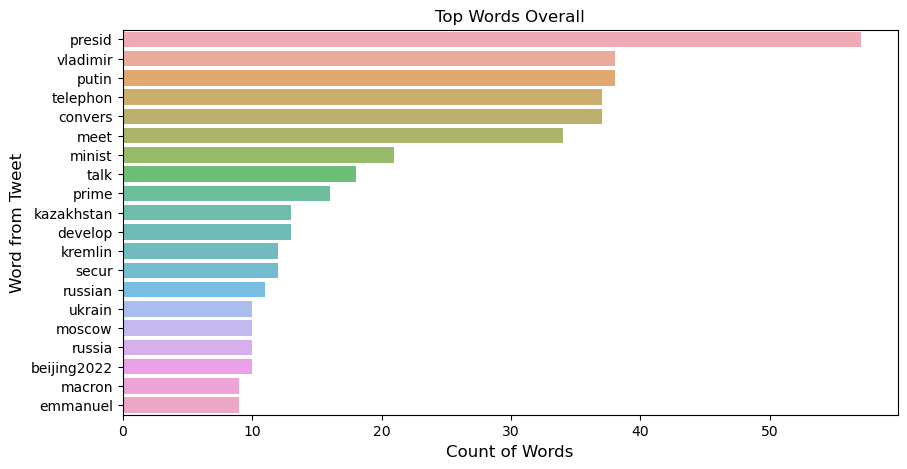

In [16]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


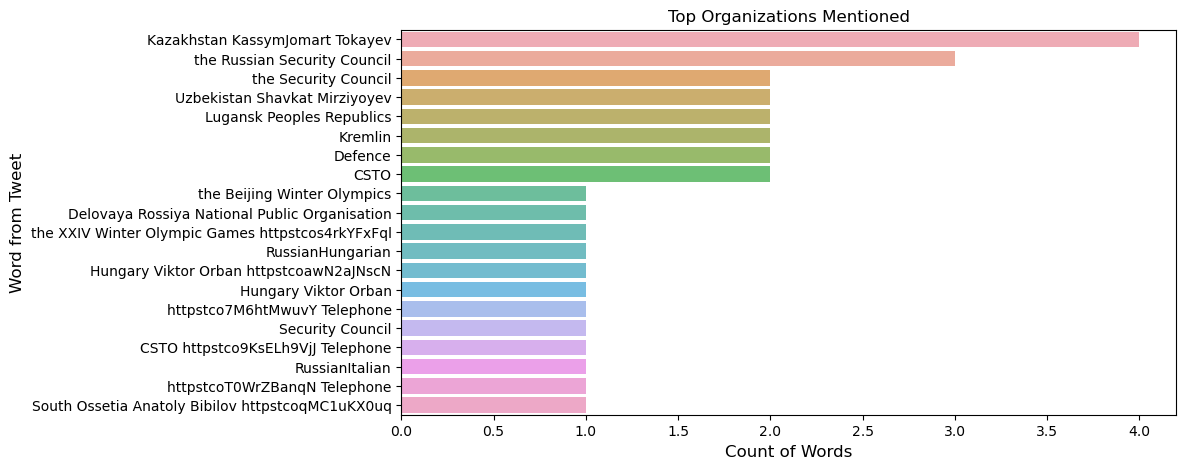

In [17]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
            
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()


df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


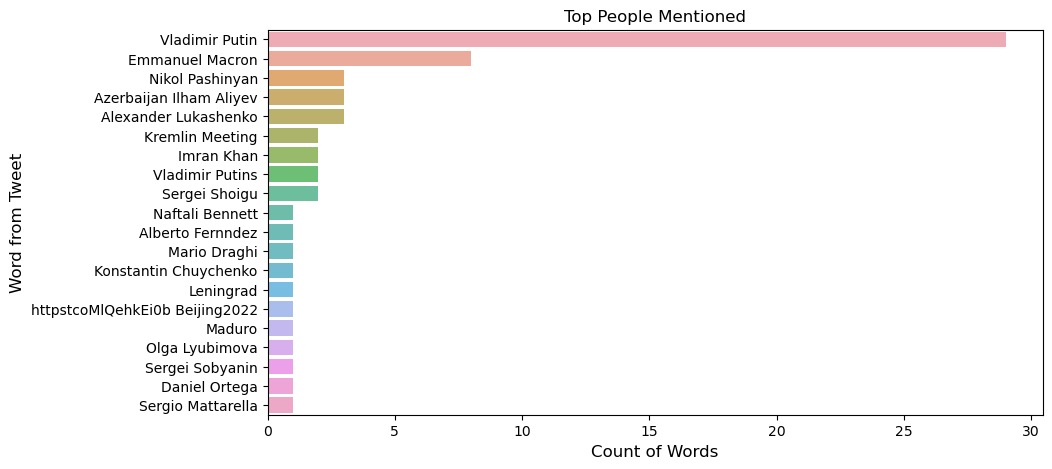

In [18]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df10 = pd.DataFrame(label, columns = ['Word','Entity'])
df10 = df10.where(df10['Entity'] == 'PERSON')
df11 = df10['Word'].value_counts()
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [21]:
stem

['telephon',
 'convers',
 'with',
 'prime',
 'minist',
 'of',
 'israel',
 'naftali',
 'bennett',
 'naftalibennett',
 'httpstcold86ewsz9p',
 'the',
 'presid',
 'congratul',
 'special',
 'oper',
 'forc',
 'personnel',
 'and',
 'veteran',
 'on',
 'their',
 'profession',
 'holiday',
 'httpstcoywjugexk5',
 'telephon',
 'convers',
 'with',
 'prime',
 'minist',
 'of',
 'armenia',
 'nikol',
 'pashinyan',
 'httpstcohrzhcoo7ld',
 'telephon',
 'convers',
 'with',
 'sadyr',
 'japarov',
 'situat',
 'in',
 'ukrain',
 'strengthen',
 'russiakyrgyzstan',
 'relat',
 'and',
 'strateg',
 'partnership',
 'httpstcox9m540bndg',
 'meet',
 'with',
 'perman',
 'member',
 'of',
 'the',
 'secur',
 'council',
 'the',
 'main',
 'topic',
 'is',
 'the',
 'situat',
 'in',
 'ukrain',
 'httpstco0jatfv7ckr',
 'httpstco9ed9hjbhhz',
 'telephon',
 'convers',
 'with',
 'presid',
 'of',
 'china',
 'xi',
 'jinp',
 'develop',
 'in',
 'ukrain',
 'httpstcoztf84jsy07',
 'vladimir',
 'putin',
 'had',
 'a',
 'telephon',
 'convers',


In [25]:
df22 = pd.DataFrame(df22)
df22

,Text
0,Telephone conversation with Prime Minister of ...
1,The President congratulated Special Operations...
2,Telephone conversation with Prime Minister of ...
3,Telephone conversation with Sadyr Japarov: sit...
4,Meeting with permanent members of the Security...
...,...
124,Vladimir Putin wished a merry Christmas to Ort...
125,#NovoOgaryovo: Meeting with Almaz-Antey Corpor...
126,Meeting with Director General of Tactical Miss...
127,"""There can be no winners in a nuclear war."" Le..."


In [33]:
text = []
for i in range(0, 129):
    text.append(df22['Text'][i])
#print(text)
bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
print(bigrams)

[('Telephone', 'conversation'), ('conversation', 'with'), ('with', 'Prime'), ('Prime', 'Minister'), ('Minister', 'of'), ('of', 'Israel'), ('Israel', 'Naftali'), ('Naftali', 'Bennett'), ('Bennett', '@naftalibennett'), ('@naftalibennett', 'https://t.co/LD86Ewsz9P'), ('The', 'President'), ('President', 'congratulated'), ('congratulated', 'Special'), ('Special', 'Operations'), ('Operations', 'Forces'), ('Forces', 'personnel'), ('personnel', 'and'), ('and', 'veterans'), ('veterans', 'on'), ('on', 'their'), ('their', 'professional'), ('professional', 'holiday'), ('holiday', 'https://t.co/YwJUGeXK5s'), ('Telephone', 'conversation'), ('conversation', 'with'), ('with', 'Prime'), ('Prime', 'Minister'), ('Minister', 'of'), ('of', 'Armenia'), ('Armenia', 'Nikol'), ('Nikol', 'Pashinyan'), ('Pashinyan', 'https://t.co/HRZhCOO7Ld'), ('Telephone', 'conversation'), ('conversation', 'with'), ('with', 'Sadyr'), ('Sadyr', 'Japarov:'), ('Japarov:', 'situation'), ('situation', 'in'), ('in', 'Ukraine,'), ('Uk

In [40]:
my_dict = {i:bigrams.count(i) for i in bigrams}
my_dict

{'Telephone': 31,
 'conversation': 70,
 'with': 162,
 'Prime': 32,
 'Minister': 42,
 'of': 210,
 'Israel': 4,
 'Naftali': 4,
 'Bennett': 4,
 '@naftalibennett': 2,
 'https://t.co/LD86Ewsz9P': 1,
 'The': 26,
 'President': 110,
 'congratulated': 8,
 'Special': 2,
 'Operations': 2,
 'Forces': 4,
 'personnel': 4,
 'and': 86,
 'veterans': 2,
 'on': 34,
 'their': 12,
 'professional': 2,
 'holiday': 4,
 'https://t.co/YwJUGeXK5s': 1,
 'Armenia': 10,
 'Nikol': 10,
 'Pashinyan': 4,
 'https://t.co/HRZhCOO7Ld': 1,
 'Sadyr': 2,
 'Japarov:': 2,
 'situation': 14,
 'in': 68,
 'Ukraine,': 12,
 'strengthening': 4,
 'Russia-Kyrgyzstan': 2,
 'relations': 12,
 'strategic': 4,
 'partnership': 2,
 'https://t.co/x9M540Bndg': 1,
 'Meeting': 30,
 'permanent': 12,
 'members': 16,
 'the': 128,
 'Security': 18,
 'Council.': 6,
 'main': 6,
 'topic': 4,
 'is': 12,
 'Ukraine': 8,
 'https://t.co/0jAtfv7ckR': 2,
 'https://t.co/9ed9hjBHHz': 1,
 'China': 4,
 'Xi': 6,
 'Jinping:': 4,
 'developments': 18,
 'https://t.co/zTF

In [38]:
import itertools
import collections

bigrams = list(itertools.chain(*bigrams))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[('of', 210),
 ('with', 162),
 ('the', 128),
 ('President', 110),
 ('and', 86),
 ('conversation', 70),
 ('in', 68),
 ('Putin', 68),
 ('Vladimir', 59),
 ('Minister', 42),
 ('a', 38),
 ('on', 34),
 ('to', 34),
 ('Prime', 32),
 ('Telephone', 31),
 ('Meeting', 30),
 ('The', 26),
 ('will', 22),
 ('talks', 22),
 ('Security', 18)]

In [35]:
bigrams.value_counts

AttributeError: 'list' object has no attribute 'value_counts'

In [29]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [32]:
# Remove URLs
tweets_no_urls = [remove_url(df22) for tweet in df22]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
#collection_words = ['climatechange', 'climate', 'change']

#tweets_nsw_nc = [[w for w in word if not w in collection_words]
 #                for word in tweets_nsw]

TypeError: expected string or bytes-like object